# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

3 Observed Trends from the Data
    1. The maximum temperature is highest when citites are close to the equator (latitude = 0).
    2. Humidity does not exceed 100 often. Through mulitple testings, I have not found a humidity value to be higher than 100.
    3. There are not many correlations that can be drawn from plotting latitude vs different weather aspects as seen in the scatter plots below. All have an R^2 value < 1.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [6]:
#set up lists to hold response info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
found_cities = []

# Build partial query URL
print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] != '404':
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        found_cities.append(city)
    else:
        print("City not found. Skipping...")
        

Beginning Data Retrieval
---------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skippin

In [8]:
#check to see if all arrays are the same length
print(len(lat))
print(len(lng))
print(len(found_cities))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(date))
print(len(country))

558
558
558
558
558
558
558
558
558


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#create a data frame from cities, lat, lng, max_temp, humidity, cloudiness, wind_speed, country, and date
weather_dict = {
    "City": found_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data_clean = weather_data.round(2)
weather_data_clean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.53,20.04,48.36,93,13,4.83,ZA,1658895539
1,pevek,69.70,170.31,35.91,83,100,11.14,RU,1658895540
2,port alfred,-33.59,26.89,59.18,75,47,7.00,ZA,1658895540
3,mataura,-46.19,168.86,47.48,95,100,4.41,NZ,1658895540
4,jamestown,42.10,-79.24,64.04,69,20,1.99,US,1658895413
...,...,...,...,...,...,...,...,...,...
553,xuddur,4.12,43.89,68.63,78,18,18.81,SO,1658895716
554,kieta,-6.22,155.63,83.71,71,37,4.52,PG,1658895717
555,mossendjo,-2.95,12.73,61.59,96,37,1.88,CG,1658895717
556,bogorodskoye,56.55,37.88,68.05,86,80,3.62,RU,1658895717


In [70]:
#Write DataFrame to CSV 
weather_data_clean.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
weather_data_cleaned = weather_data_clean[weather_data_clean['Humidity'] <= 100]

In [26]:
#use .describe in order to get the description of numerical data e.g. count, mean, std dev, percentiles (quartiles)
weather_data_cleaned.describe().round(2)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.00,558.00,558.00,558.00,558.00,558.00,5.580000e+02
mean,18.73,21.93,69.50,71.50,51.46,7.64,1.658896e+09
std,33.45,90.45,13.12,20.41,38.15,5.38,9.218000e+01
min,-54.80,-175.20,30.31,1.00,0.00,0.00,1.658895e+09
25%,-9.84,-57.49,59.97,59.00,14.00,3.44,1.658896e+09
50%,21.26,24.44,70.23,76.00,52.00,6.32,1.658896e+09
75%,49.30,105.04,79.74,88.00,92.75,11.18,1.658896e+09
max,78.22,179.32,99.09,100.00,100.00,27.63,1.658896e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

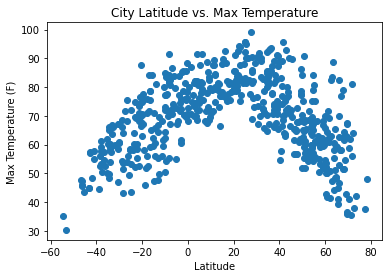

In [13]:
#create a scatter plot for temperature vs latitude
x_values = weather_data_cleaned['Lat']
y_values = weather_data_cleaned['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature")
plt.show()

# The following plot is showing the change in max temperature based on the latitude of the city. 
#Based on the data, it can be seen that the max temperature is higher when the city is closer to the equator (0 latitude)

## Latitude vs. Humidity Plot

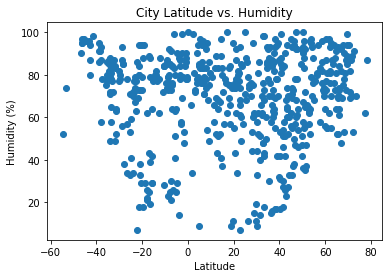

In [33]:
#create a scatter plot for latitude vs humidity
x_values = weather_data_cleaned['Lat']
y_values = weather_data_cleaned['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.show()

# The following plot is showing the change in humidity based on the latitude of the city. 
#Based on the data, no conclusion can be made on a correlation between latitude vs humidity.

## Latitude vs. Cloudiness Plot

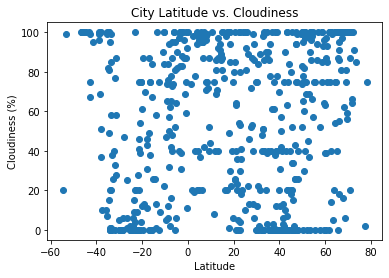

In [37]:
#create a scatter plot for latitude vs cloudiness
x_values = weather_data_cleaned['Lat']
y_values = weather_data_cleaned['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.show()

# The following plot is showing the change in cloudiness based on the latitude of the city. 
#Based on the data, no conclusion can be made on a correlation between latitude vs cloudiness.

## Latitude vs. Wind Speed Plot

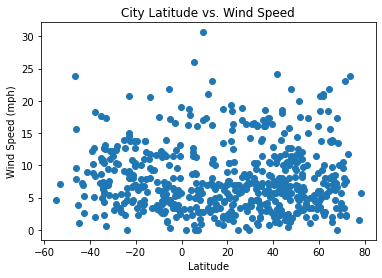

In [38]:
#create a scatter plot for latitude vs cloudiness
x_values = weather_data_cleaned['Lat']
y_values = weather_data_cleaned['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.show()

# The following plot is showing the change in wind speed based on the latitude of the city. 
#Based on the data, no conclusion can be made on a correlation between latitude vs wind speed. 
#However, there does appear to be lower wind speeds at all latitudes compared to high higher wind speeds (>15 mph).

## Linear Regression

In [42]:
north_lat = weather_data_cleaned['Lat'] >= 0
clean_north_lat = weather_data_cleaned[north_lat]

south_lat = weather_data_cleaned['Lat'] < 0
clean_south_lat = weather_data_cleaned[south_lat]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y= -0.49x +92.42
R Value: -0.686
R^2 Value: 0.4706


<function matplotlib.pyplot.show(close=None, block=None)>

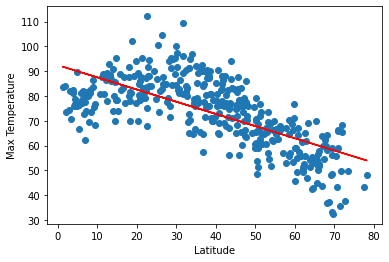

In [61]:
#set x and y values
x_values = clean_north_lat['Lat']
y_values = clean_north_lat['Max Temp']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show

# The following plot is showing the change in max temperature based on the latitude of the city. 
#Based on the data, it can be seen that the max temperature is higher when the city is closer to 20 latitude. 
#However, the R^2 value is not close to 1 indicating there is not a correlation between temperature and norther latitude

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y= 0.8x +83.94
R Value: 0.7245
R^2 Value: 0.5248


<function matplotlib.pyplot.show(close=None, block=None)>

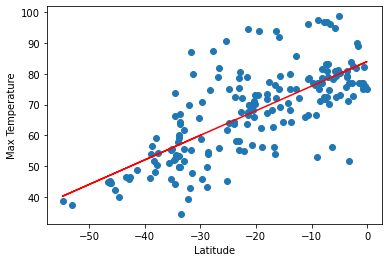

In [62]:
#set x and y values
x_values = clean_south_lat['Lat']
y_values = clean_south_lat['Max Temp']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show

# The following plot is showing the change in max temperature based on the latitude of the city. 
#Based on the data, it can be seen that the max temperature is higher when the city is closer to the equator. 
#However, the R^2 value is not close to 1 indicating there is not a correlation between temperature and latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y= 0.08x +66.0
R Value: 0.0759
R^2 Value: 0.0058


<function matplotlib.pyplot.show(close=None, block=None)>

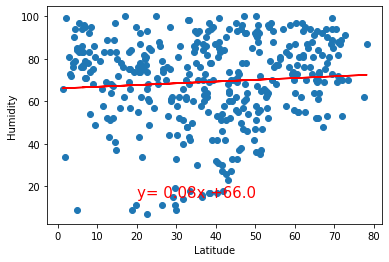

In [63]:
#set x and y values
x_values = clean_north_lat['Lat']
y_values = clean_north_lat['Humidity']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show

# The following plot is showing the change in humidty based on the latitude of the city. 
#Based on the data, it can be seen that the humidity is overall greater than 40% at all latitudes, but data is scattered. 
#However, the R^2 value is not close to 1 indicating there is not a correlation between humidity and latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y= -0.31x +63.83
R Value: -0.1847
R^2 Value: 0.0341


<function matplotlib.pyplot.show(close=None, block=None)>

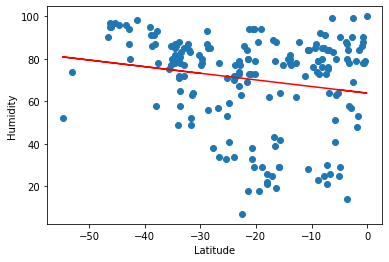

In [64]:
#set x and y values
x_values = clean_south_lat['Lat']
y_values = clean_south_lat['Humidity']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show

# The following plot is showing the change in humidty based on the latitude of the city. 
#Based on the data, it can be seen that the humidity is overall greater than 40% at all latitudes, but data is scattered. 
#Humidity readings are scarce below -40 latitude.
#However, the R^2 value is not close to 1 indicating there is not a correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y= 0.07x +53.77
R Value: 0.0381
R^2 Value: 0.0014


<function matplotlib.pyplot.show(close=None, block=None)>

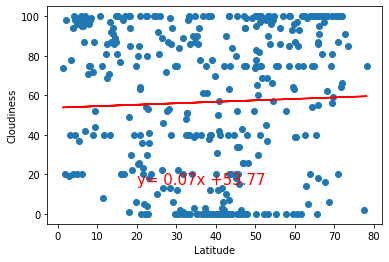

In [65]:
#set x and y values
x_values = clean_north_lat['Lat']
y_values = clean_north_lat['Cloudiness']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show

# The following plot is showing the change in cloudiness based on the latitude of the city. 
#Based on the plot, there isn't a clear indicator of latitude affecting cloudiness. 
#The R^2 value is not close to 1 indicating there is not a correlation between cloudiness and latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y= 0.27x +54.44
R Value: 0.0937
R^2 Value: 0.0088


<function matplotlib.pyplot.show(close=None, block=None)>

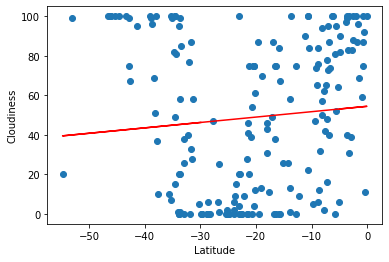

In [66]:
#set x and y values
x_values = clean_south_lat['Lat']
y_values = clean_south_lat['Cloudiness']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show

# The following plot is showing the change in cloudiness based on the latitude of the city. 
#Based on the plot, there isn't a clear indicator of latitude affecting cloudiness. 
#However, cloudiness data is scarce below -40 latitude.
#The R^2 value is not close to 1 indicating there is not a correlation between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y= 0.01x +7.48
R Value: 0.0356
R^2 Value: 0.0013


<function matplotlib.pyplot.show(close=None, block=None)>

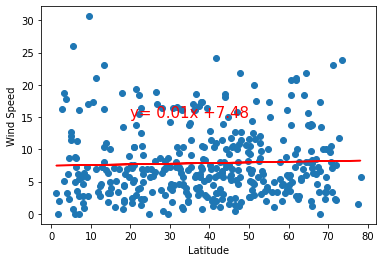

In [67]:
#set x and y values
x_values = clean_north_lat['Lat']
y_values = clean_north_lat['Wind Speed']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show

# The following plot is showing the change in wind speed based on the latitude of the city. 
#Based on the plot, high wind speeds (>15 mph) are not common at all latitudes.
#The R^2 value is not close to 1 indicating there is not a linear correlation between wind speed and latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y= -0.04x +7.32
R Value: -0.1077
R^2 Value: 0.0116


<function matplotlib.pyplot.show(close=None, block=None)>

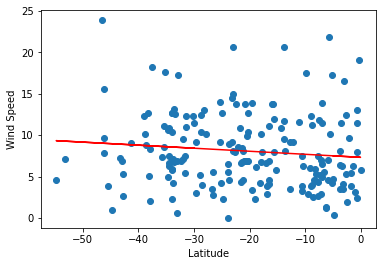

In [68]:
#set x and y values
x_values = clean_south_lat['Lat']
y_values = clean_south_lat['Wind Speed']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show

# The following plot is showing the change in wind speed based on the latitude of the city. 
#Based on the plot, high wind speeds (>15 mph) are not common at all latitudes.
#The R^2 value is not close to 1 indicating there is not a linear correlation between wind speed and latitude